In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_ = train.copy()
test_ = test.copy()
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# 数据整体处理

## 统计缺失情况

In [4]:
missing = train.isnull().sum().sort_values(ascending = False)
pd.concat([missing, missing / train.shape[0]], axis=1, keys=['Num', 'Ratio'])

,Num,Ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [5]:
missing = test.isnull().sum().sort_values(ascending = False)
pd.concat([missing, missing / test.shape[0]], axis=1, keys=['Num', 'Ratio'])

,Num,Ratio
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


## Features

数据缺失较多的Feature可以直接删除

In [6]:
bad_features = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
                'GarageFinish', 'GarageType', 'GarageQual', 'GarageYrBlt', 'GarageCond', 
                'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']

train.drop(bad_features, axis=1, inplace=True)
test.drop(bad_features, axis=1, inplace=True)

In [7]:
numerical_features = train.select_dtypes(exclude = ['object']).columns
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features, categorical_features

(Index([u'Id', u'MSSubClass', u'LotArea', u'OverallQual', u'OverallCond',
        u'YearBuilt', u'YearRemodAdd', u'MasVnrArea', u'BsmtFinSF1',
        u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF', u'2ndFlrSF',
        u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath',
        u'FullBath', u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr',
        u'TotRmsAbvGrd', u'Fireplaces', u'GarageCars', u'GarageArea',
        u'WoodDeckSF', u'OpenPorchSF', u'EnclosedPorch', u'3SsnPorch',
        u'ScreenPorch', u'PoolArea', u'MiscVal', u'MoSold', u'YrSold',
        u'SalePrice'],
       dtype='object'),
 Index([u'MSZoning', u'Street', u'LotShape', u'LandContour', u'Utilities',
        u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
        u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle', u'RoofMatl',
        u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'ExterQual',
        u'ExterCond', u'Foundation', u'Heating', u'HeatingQC', u'CentralAir',
        u'

## Rows

看是否有些行，有多个列都有缺失的数据，直接删除，没有修复的价值

In [8]:
train.isnull().T.sum().sort_values(ascending=False)

977     2
1278    2
234     2
973     2
1243    2
650     2
936     2
529     2
1379    1
479     0
480     0
481     0
482     0
483     0
484     0
1459    0
486     0
487     0
488     0
489     0
490     0
491     0
492     0
493     0
494     0
485     0
477     0
478     0
467     0
459     0
       ..
993     0
994     0
995     0
996     0
997     0
998     0
999     0
980     0
979     0
978     0
965     0
957     0
958     0
959     0
960     0
961     0
962     0
963     0
964     0
966     0
976     0
967     0
968     0
969     0
970     0
971     0
972     0
974     0
975     0
0       0
dtype: int64

In [9]:
missing_idx = [977, 1278, 234, 973, 1243, 650, 936, 529, 1379]
train.ix[missing_idx, ['MasVnrType', 'MasVnrArea', 'Electrical']]

,MasVnrType,MasVnrArea,Electrical
977,NaN,NaN,SBrkr
1278,NaN,NaN,SBrkr
234,NaN,NaN,SBrkr
973,NaN,NaN,SBrkr
1243,NaN,NaN,SBrkr
650,NaN,NaN,SBrkr
936,NaN,NaN,SBrkr
529,NaN,NaN,SBrkr
1379,None,0.0,NaN


In [10]:
train.drop(missing_idx, inplace=True)

In [11]:
train_.shape[0] - train.shape[0], train_.shape[1] - train.shape[1]

(9, 16)

# Features

## SalePrice

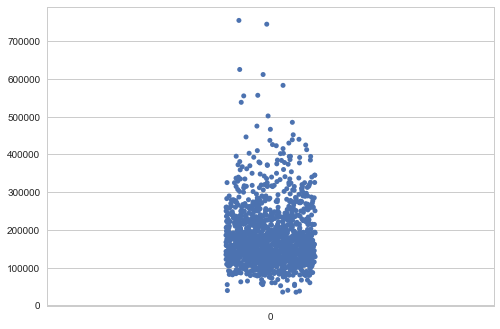

In [12]:
sns.stripplot(data=train.SalePrice, jitter=True)

In [13]:
train.drop(train[train.SalePrice > 510000].index, inplace=True)

如果结果是连续型变量，需要习惯性查看其是否属于**正态分布**，如果不是，需要调整

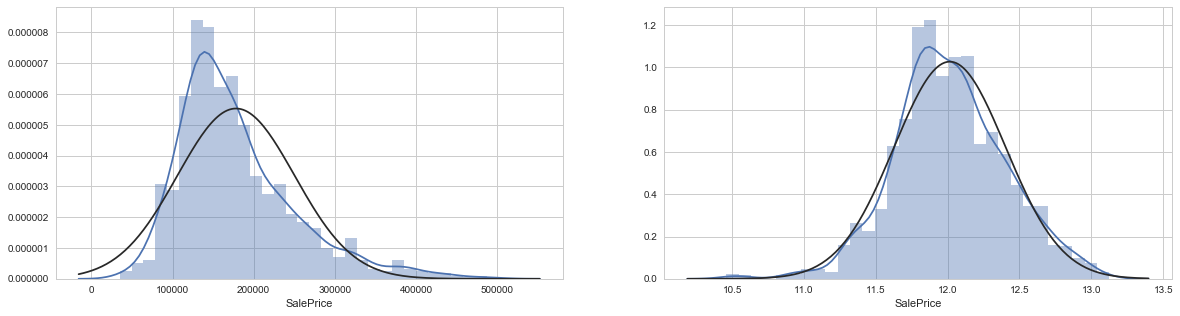

In [14]:
from scipy.stats import norm

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

sns.distplot(train.SalePrice, fit=norm, ax=ax1)
sns.distplot(np.log1p(train.SalePrice), fit=norm, ax=ax2)

如果是正态分布，**需要在正态分布下看是否有Outliers**，因为最终是它的log参与模型预测

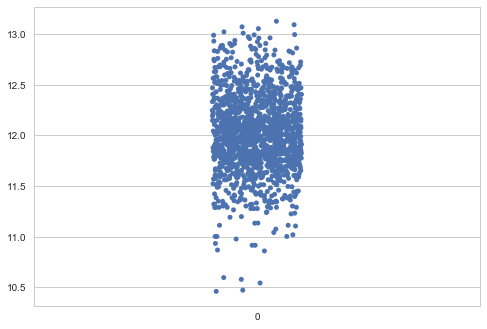

In [15]:
sns.stripplot(data=np.log1p(train.SalePrice), jitter=True)

In [16]:
train.drop(train[np.log1p(train.SalePrice) < 10.75].index, inplace=True)

# Numerical Features

## Feature-Result散点图

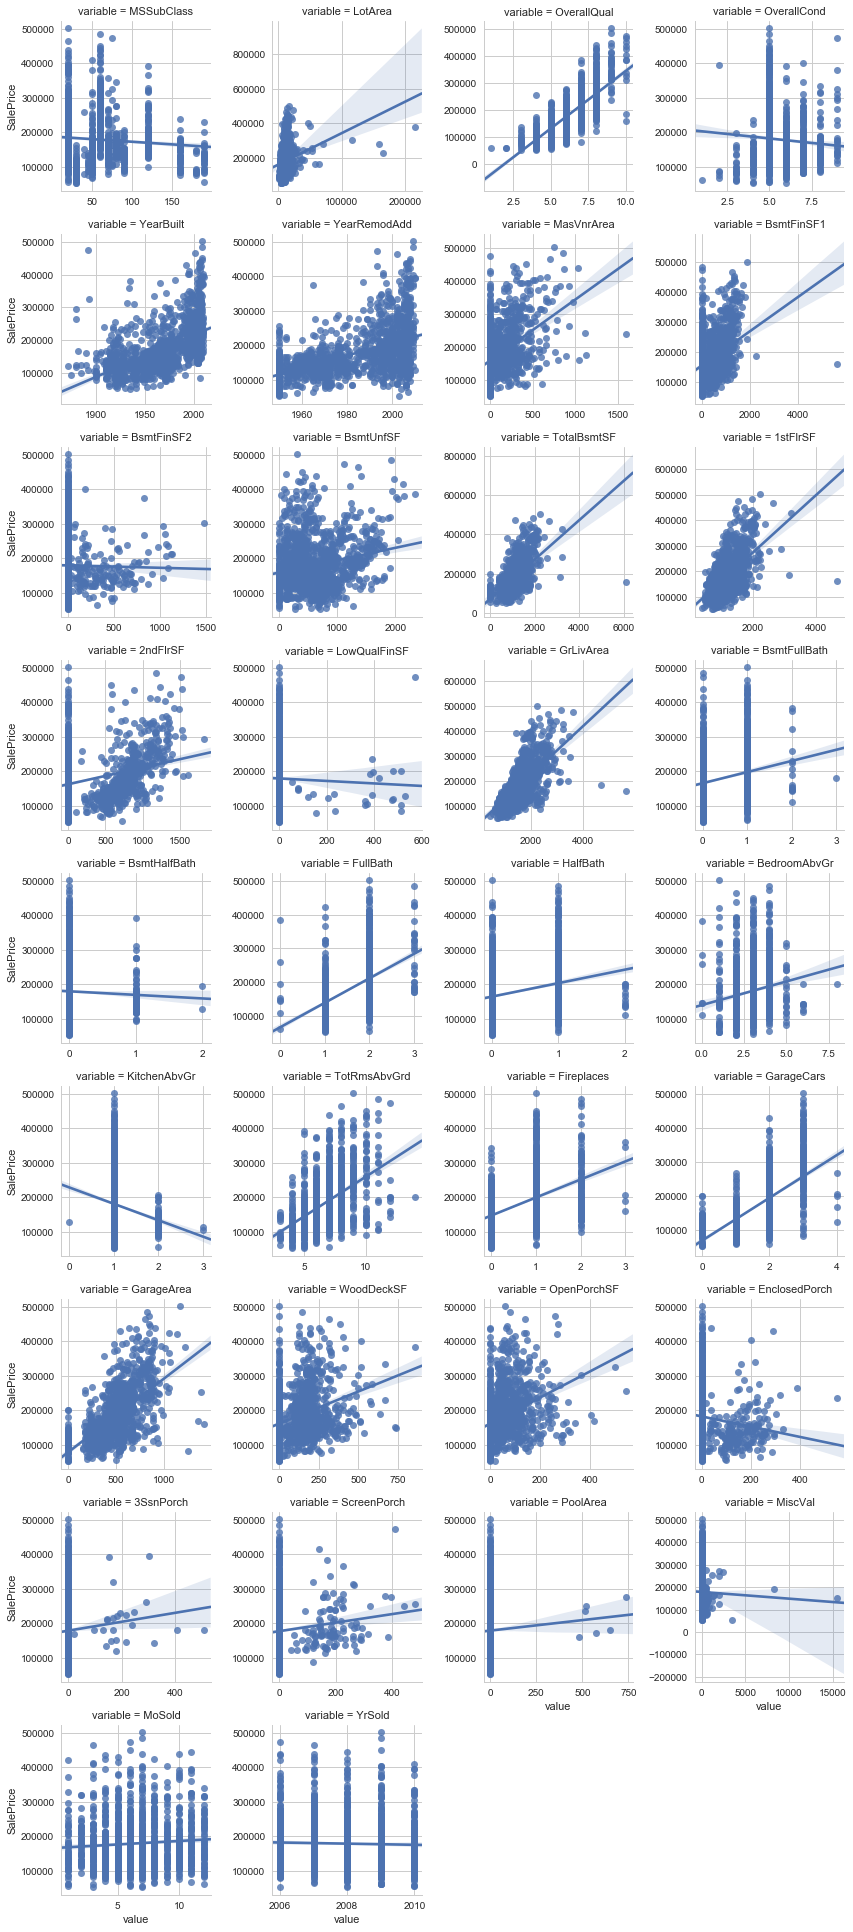

In [17]:
num_melt = pd.melt(train, id_vars=['SalePrice'], 
                   value_vars = [f for f in numerical_features if f not in ['Id', 'SalePrice']])
g = sns.FacetGrid(data=num_melt, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.regplot, 'value', 'SalePrice')

In [18]:
train.drop(train[train.LotArea > 100000].index, inplace=True)
train.drop(train[train.MasVnrArea > 1500].index, inplace=True)
train.drop(train[train.BsmtFinSF1 > 4000].index, inplace=True)
train.drop(train[train.BsmtFinSF2 > 1300].index, inplace=True)
train.drop(train[train.TotalBsmtSF > 4000].index, inplace=True)
train.drop(train[train['1stFlrSF'] > 4000].index, inplace=True)
train.drop(train[train.LowQualFinSF == 572].index, inplace=True)
train.drop(train[train.GrLivArea > 4000].index, inplace=True)
train.drop(train[train.OpenPorchSF == 523].index, inplace=True)
train.drop(train[train.MiscVal > 5000].index, inplace=True)

**这个步骤会使得预测效果有提升**

## Feature密度图

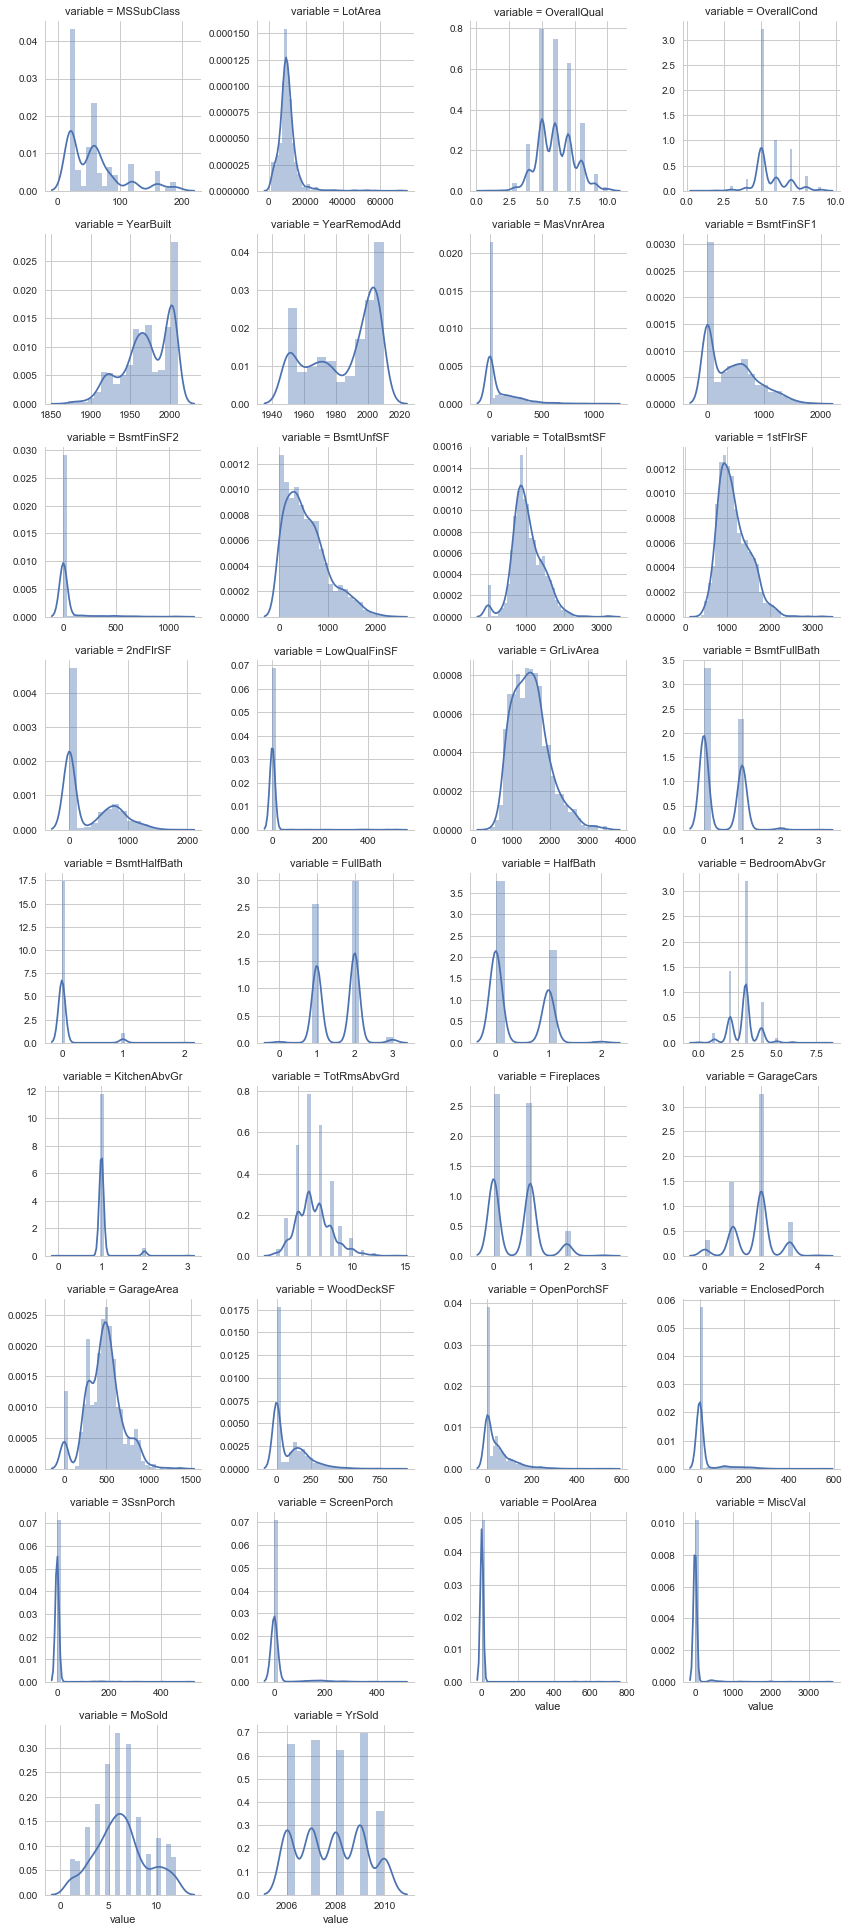

In [19]:
num_melt = pd.melt(train, id_vars=['SalePrice'], 
                   value_vars = [f for f in numerical_features if f not in ['Id', 'SalePrice']])
g = sns.FacetGrid(data=num_melt, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.distplot, "value")

### 正态分布化

**对于LinearRegression的预测效果改善非常明显**

In [20]:
log_features = ['LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']

for f in log_features:
    train[f + '_Log'] = np.log1p(train[f])
    test[f + '_Log'] = np.log1p(test[f])

### 正态分布下Outliers

尝试在正态分布下删除这些Feature的Outliers，不过效果不明显。不过我觉得这个是合理的。

### 0-1分布（正态分布下观察）

通过观察，TotalBsmtFS和GargeArea被log后，数据集中的点和分布到0的点形成2个部分，所以尝试改为0-1分布


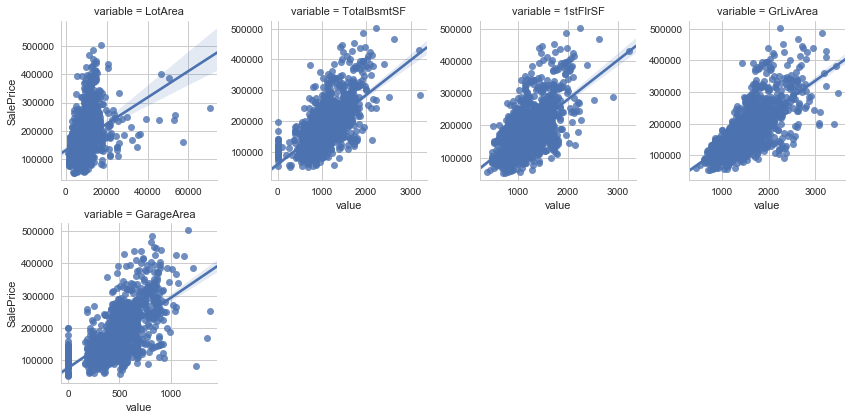

In [21]:
num_melt = pd.melt(train, id_vars=['SalePrice'],  value_vars = log_features)
g = sns.FacetGrid(data=num_melt, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.regplot, 'value', 'SalePrice')

```
f = lambda x: 0 if x == 0 else 1
train['HasBsmt'] = train.TotalBsmtSF.apply(f)
train['HasGarage'] = train.GarageArea.apply(f)

test['HasBsmt'] = test.TotalBsmtSF.apply(f)
test['HasGarage'] = test.GarageArea.apply(f)
```

尝试发现效果没有明显提升，反而略有下降

### 0-1分布（正常分布下观察）

```
f = (lambda x: 0 if x == 0 else 1)
train['LowQualFinSF_Bool'] = train.LowQualFinSF.apply(f)
train['3SsnPorch_Bool'] = train['3SsnPorch'].apply(f)
train['PoolArea_Bool'] = train.PoolArea.apply(f)
train['MiscVal_Bool'] = train.MiscVal.apply(f)
```
预测结果稍微有所降低，故不适用

### numerical categorical Feature

numerical categorical Feature的每一个unique feature替换为SalePrice的均值

```
all_mean_price = train.SalePrice.mean()
numerical_categorical_features = ['MSSubClass', 'OverallQual', 'OverallCond','BsmtFullBath', 'BsmtHalfBath',
                                  'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
                                  'Fireplaces', 'GarageCars','MoSold', 'YrSold']
numerical_categorical_features_M = []

for f in numerical_categorical_features:
    numerical_categorical_features_M.append(f + "_M")

    train[f + "_M"] = np.nan
    test[f + "_M"] = np.nan
    for uniq in train[f].unique():
        if uniq is None:
            continue

        mean_price = train.loc[train[f] == uniq, "SalePrice"].mean()
        train.loc[train[f] == uniq, f + "_M"] = mean_price
        test.loc[test[f] == uniq, f + "_M"] = mean_price

    train.loc[train[f + "_M"].isnull(), f + "_M"] = all_mean_price
    test.loc[test[f + "_M"].isnull(), f + "_M"] = all_mean_price

print numerical_categorical_features_M
```

预测结果大大降低，故不采用

```
Ridge 0.104723
LinearRegression  0.105620
Elasticnet  0.107904
XGBoost 0.119653
到
Elasticnet  0.111569
Ridge 0.114212
LinearRegression  0.115905
XGBoost 0.120145
```

# non-numerical categorical Features

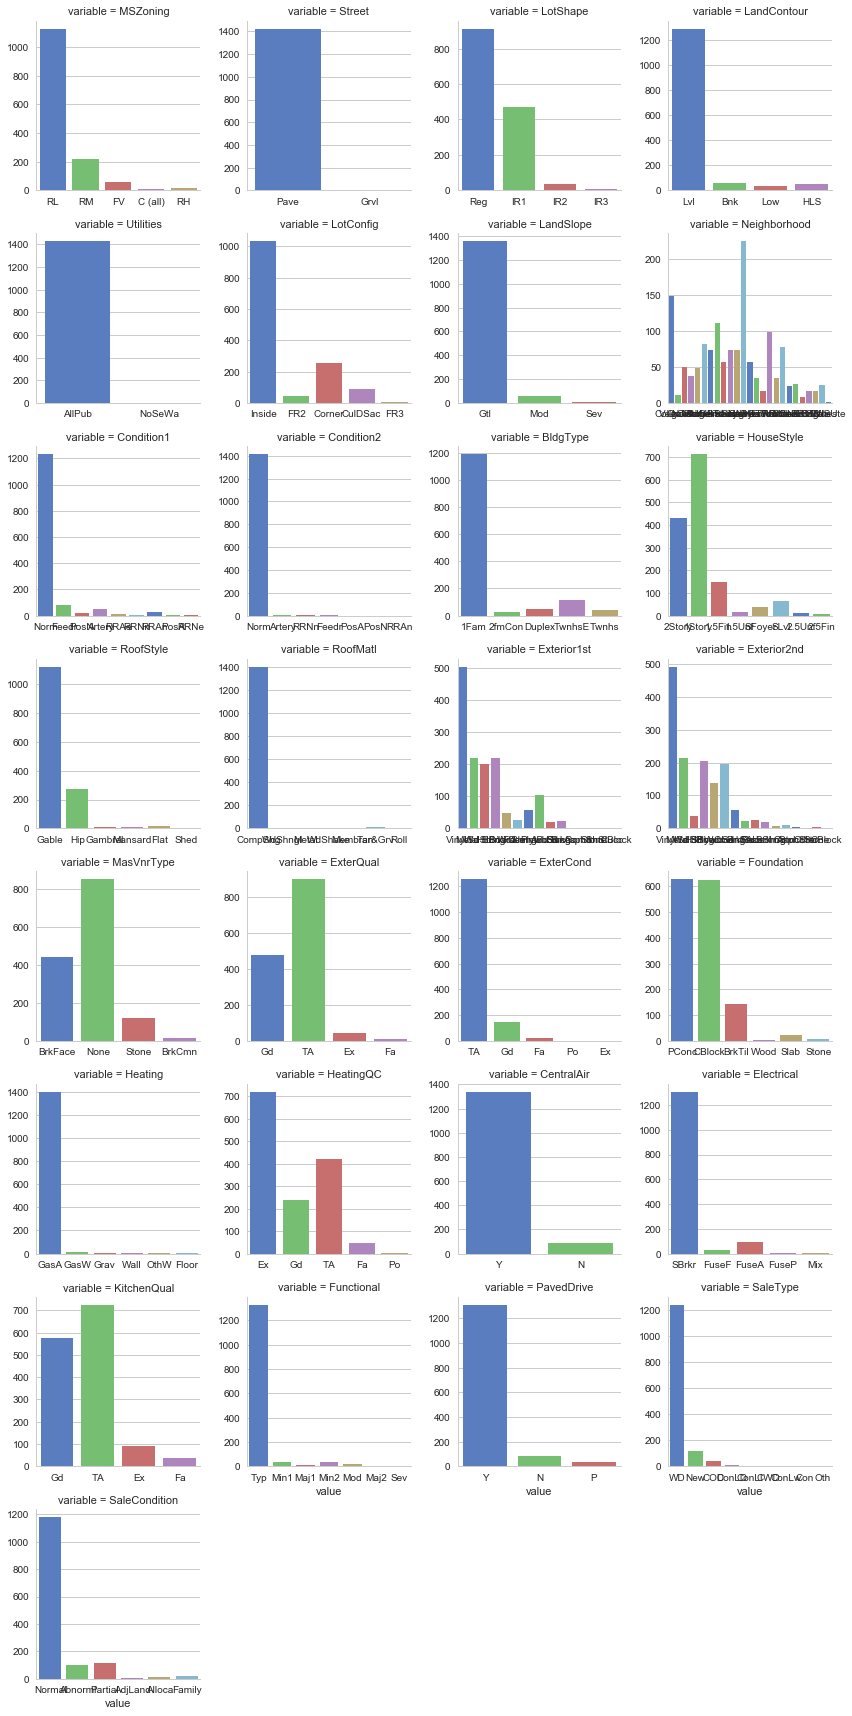

In [22]:
cat_melt = pd.melt(train, id_vars=['SalePrice'], value_vars=[f for f in categorical_features])
g = sns.FacetGrid(cat_melt, col='variable', col_wrap=4, sharex=False, sharey=False)
g.map(sns.countplot, 'value', palette="muted")

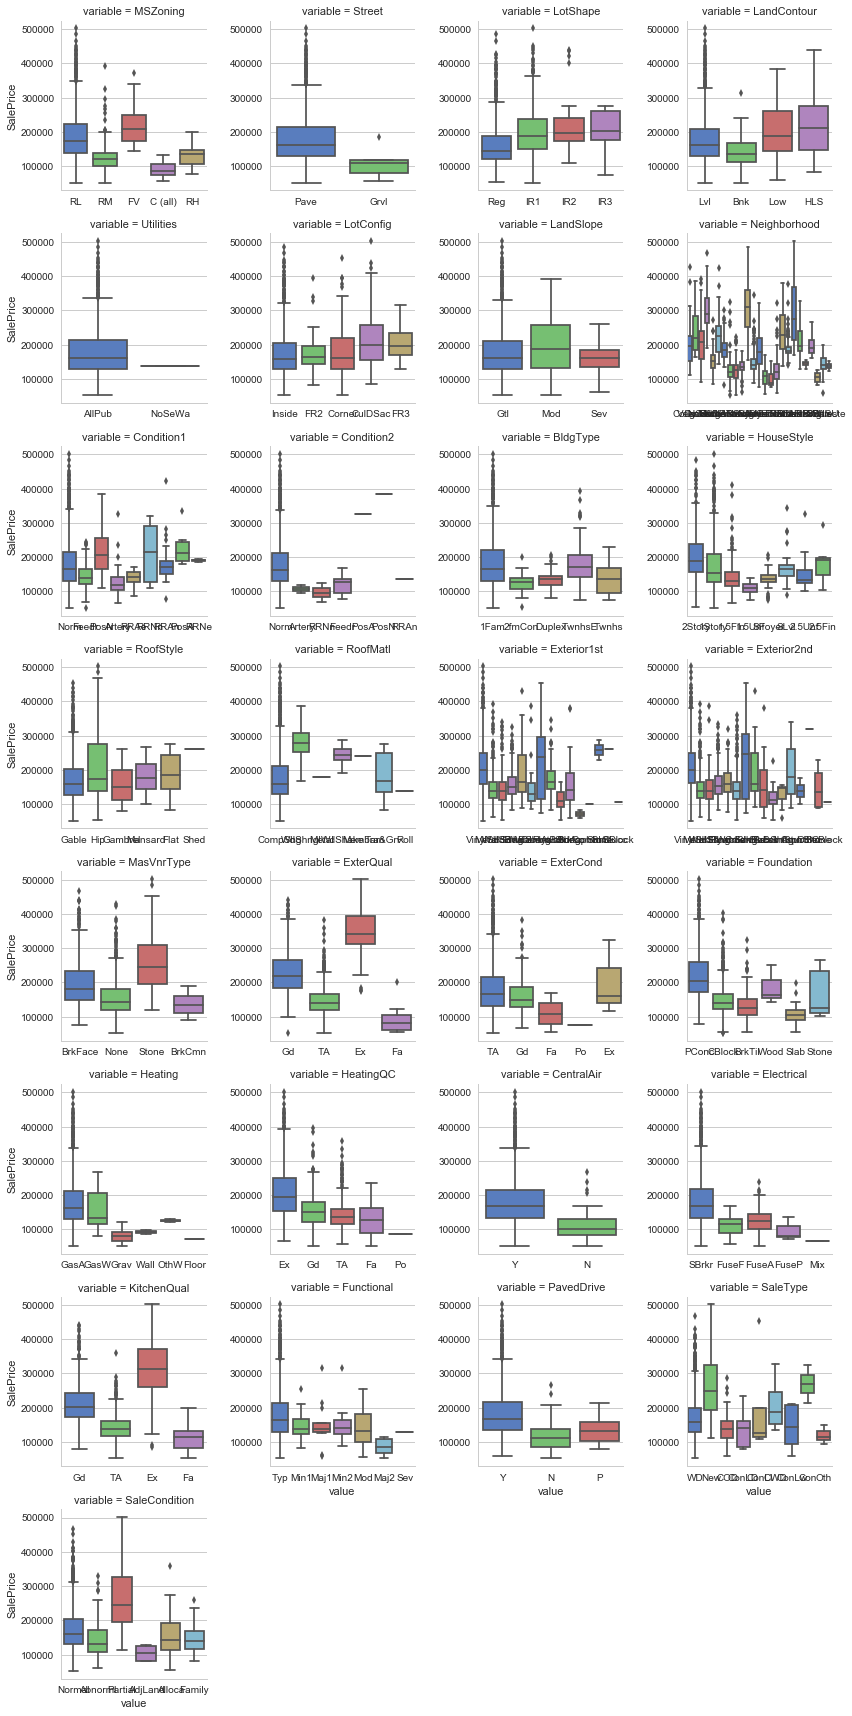

In [23]:
cat_melt = pd.melt(train, id_vars=['SalePrice'], value_vars=[f for f in categorical_features])
g = sns.FacetGrid(cat_melt, col='variable', col_wrap=4, sharex=False, sharey=False)
g.map(sns.boxplot, 'value', 'SalePrice', palette="muted")

stripplot + jitter用于Outlier排除

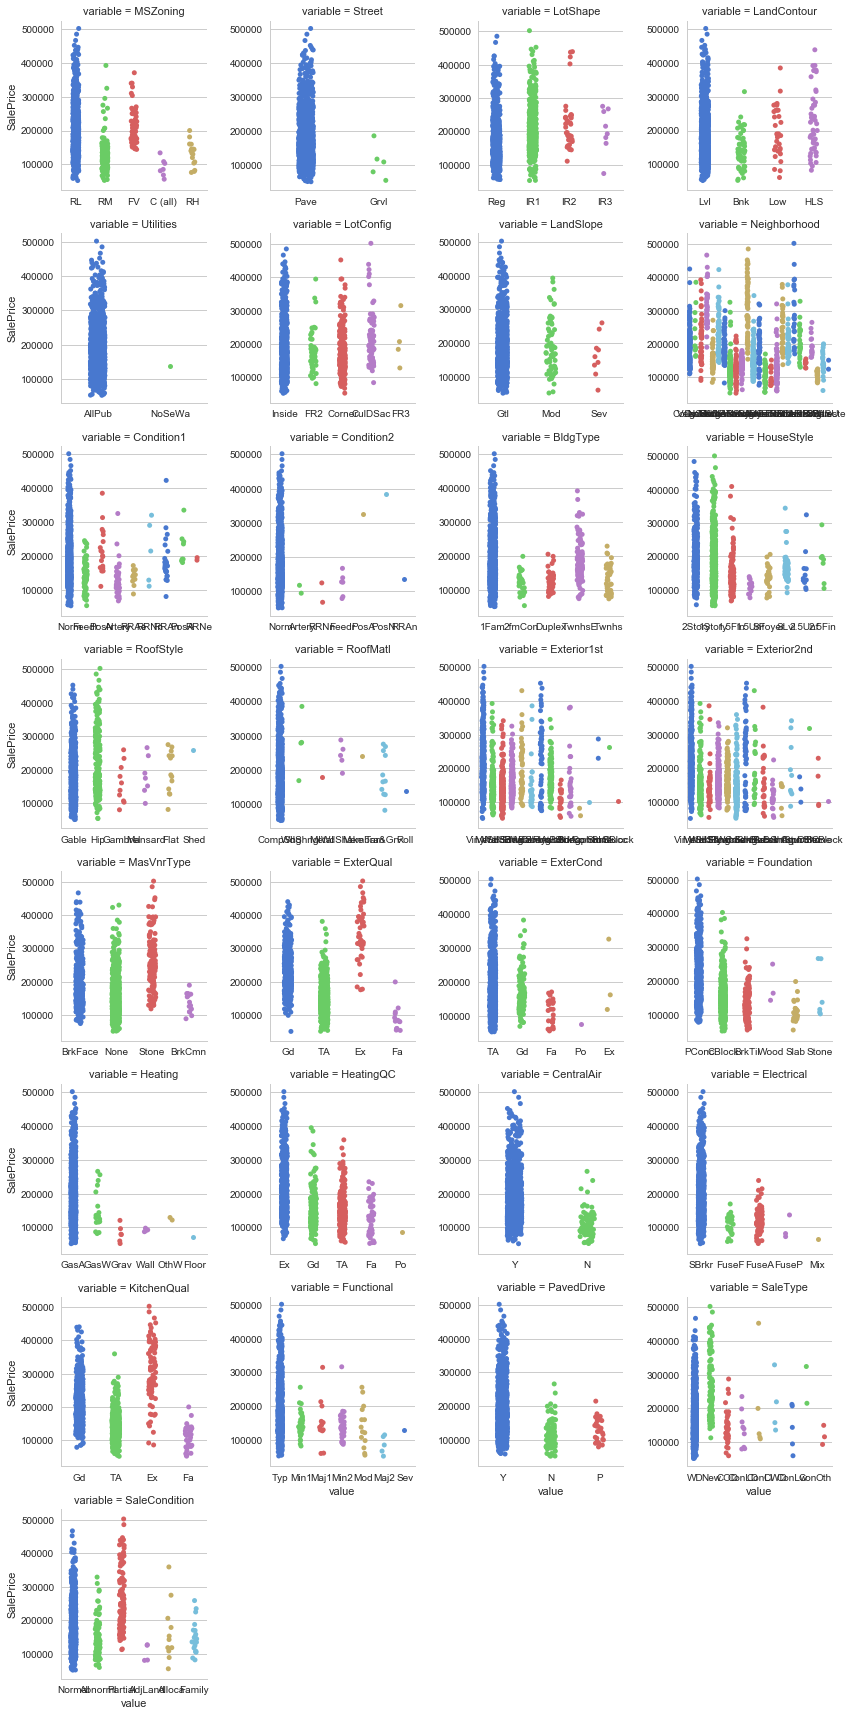

In [24]:
cat_melt = pd.melt(train, id_vars=['SalePrice'], value_vars=[f for f in categorical_features])
g = sns.FacetGrid(cat_melt, col='variable', col_wrap=4, sharex=False, sharey=False)
g.map(sns.stripplot, 'value', 'SalePrice', jitter=True, palette="muted")

In [25]:
train.drop(train[(train.LotShape == 'IR2') & (train.SalePrice > 300000)].index, inplace=True)
train.drop(train[(train.LandContour == 'Bnk') & (train.SalePrice > 300000)].index, inplace=True)
train.drop(train[(train.PavedDrive == 'P') & (train.SalePrice > 200000)].index, inplace=True)
train.drop(train[(train.MSZoning == 'RL') & (train.SalePrice > 500000)].index, inplace=True)
train.drop(train[(train.KitchenQual == 'TA') & (train.SalePrice > 300000)].index, inplace=True)
train.drop(train[(train.MSZoning == 'RM') & (train.SalePrice > 350000)].index, inplace=True)
train.drop(train[(train.LotConfig == 'Corner') & (train.SalePrice > 410000)].index, inplace=True)
train.drop(train[(train.Functional == 'Min2') & (train.SalePrice > 300000)].index, inplace=True)
train.drop(train[(train.HouseStyle == '1.5Fin') & (train.SalePrice > 400000)].index, inplace=True)
train.drop(train[(train.LandContour == 'Low') & (train.SalePrice > 350000)].index, inplace=True)

最终的预测结果也显示，效果有一点点提升，不过不如numerical数据清除奇异值带来的效果那么明显

# Correlations

这里还只能把Numerical Feature和结果的相关性表示出来

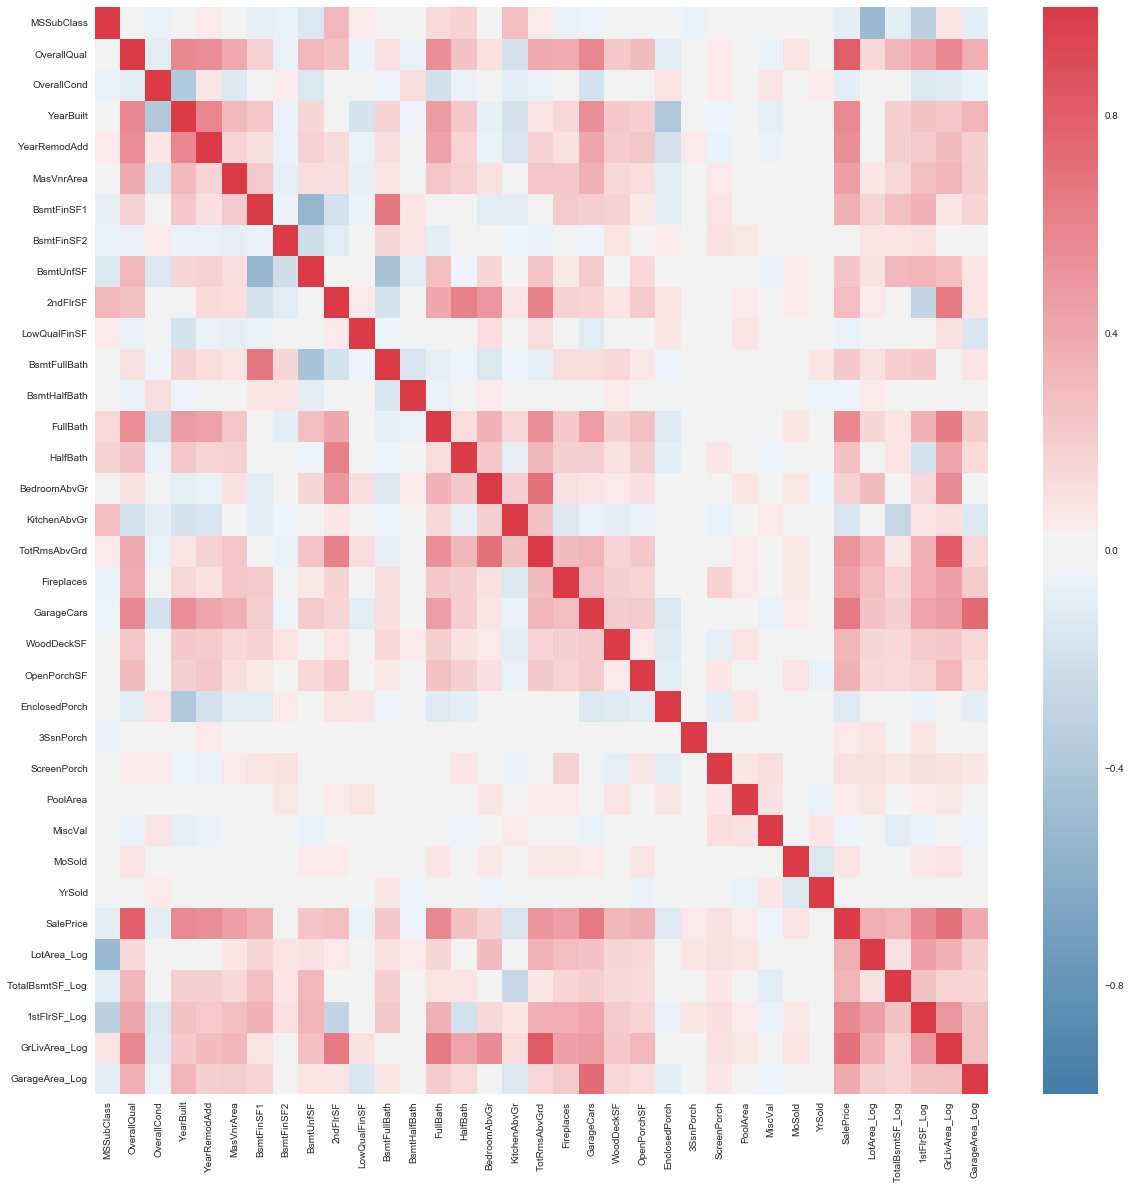

In [26]:
corr = train.drop(log_features + ['Id'], axis=1).corr()

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cmap=sns.diverging_palette(240, 10, as_cmap = True), ax=ax)

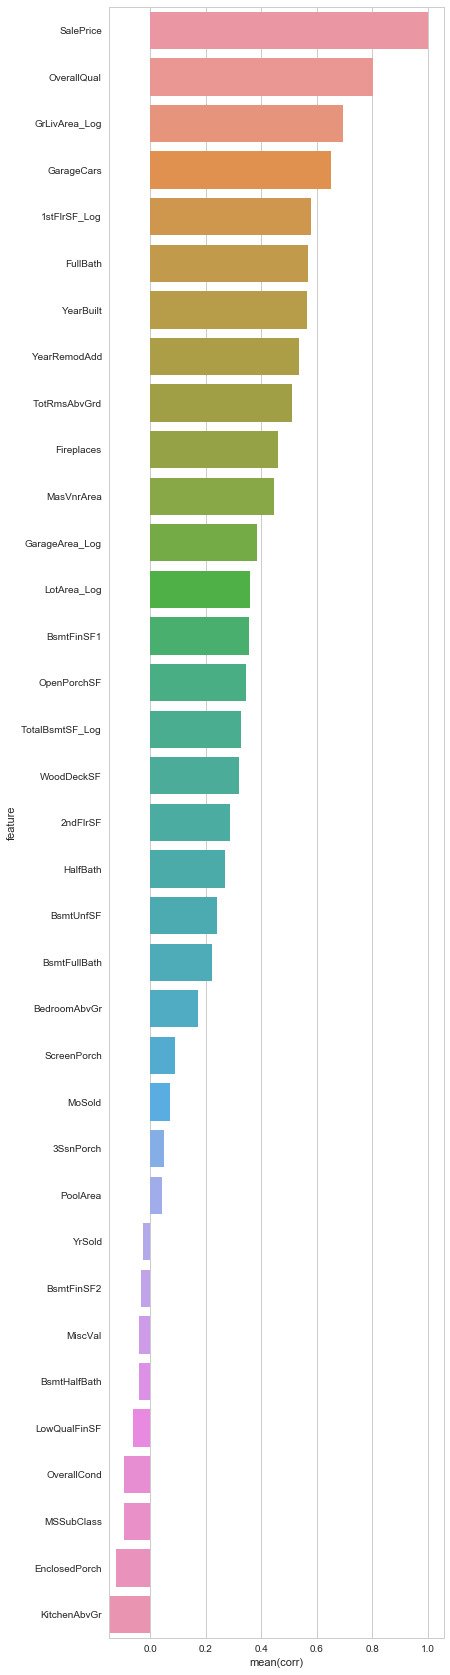

In [27]:
corr = corr.SalePrice
m = DataFrame(pd.concat([DataFrame(corr.index, columns=['feature']), DataFrame(corr.values, columns=['corr'])], axis=1))
plt.figure(figsize=(6, 30))
sns.barplot(data=m.sort_values(by='corr', ascending=False), x='corr', y='feature')

# 数据修复

In [28]:
train.isnull().sum().sort_values(ascending=False)

GarageArea_Log     0
ExterQual          0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterCond          0
YearBuilt          0
Foundation         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
YearRemodAdd       0
OverallCond        0
GrLivArea_Log      0
Utilities          0
MSSubClass         0
MSZoning           0
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
OverallQual        0
LandSlope          0
Neighborhood       0
                  ..
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
YrSold             0
1stFlrSF           0
SaleType           0
SaleCondition      0
SalePrice          0
LotArea_Log        0
TotalBsmtSF_Log    0
1stFlrSF_Log       0
WoodDeckSF         0
PavedDrive         0
GarageArea         0
GarageCars         0
Fireplaces   

In [29]:
test.isnull().sum().sort_values(ascending=False)

MasVnrType         16
MasVnrArea         15
MSZoning            4
Functional          2
BsmtFullBath        2
Utilities           2
BsmtHalfBath        2
GarageArea          1
BsmtUnfSF           1
TotalBsmtSF         1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
BsmtFinSF1          1
GarageCars          1
GarageArea_Log      1
BsmtFinSF2          1
TotalBsmtSF_Log     1
SaleType            1
Condition2          0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
LotArea             0
Street              0
LotShape            0
RoofMatl            0
BldgType            0
LotConfig           0
                   ..
LandContour         0
CentralAir          0
Heating             0
HeatingQC           0
1stFlrSF_Log        0
LotArea_Log         0
SaleCondition       0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchS

In [30]:
test.loc[test.MasVnrType.isnull(), 'MasVnrType'] = 'None'
test.loc[test.MasVnrArea.isnull(), 'MasVnrArea'] = 0.0
test.loc[test.MSZoning.isnull(), 'MSZoning'] = 'RL'
test.loc[test.BsmtFullBath.isnull(), 'BsmtFullBath'] = 0
test.loc[test.BsmtHalfBath.isnull(), 'BsmtHalfBath'] = 0
test.loc[test.Functional.isnull(), 'Functional'] = 'Typ'
test.loc[test.Utilities.isnull(), 'Utilities'] = 'AllPub'
test.loc[test.BsmtFinSF2.isnull(), 'BsmtFinSF2'] = 0
test.loc[test.SaleType.isnull(), 'SaleType'] = 'WD'
test.loc[test.TotalBsmtSF.isnull(), 'TotalBsmtSF'] = 0
test.loc[test.KitchenQual.isnull(), 'KitchenQual'] = 'TA'
test.loc[test.BsmtUnfSF.isnull(), 'BsmtUnfSF'] = 0
test.loc[test.Exterior1st.isnull(), 'Exterior1st'] = 'VinylSd'
test.loc[test.GarageArea_Log.isnull(), 'GarageArea_Log'] = 0.0
test.loc[test.BsmtFinSF1.isnull(), 'BsmtFinSF1'] = 0
test.loc[test.TotalBsmtSF_Log.isnull(), 'TotalBsmtSF_Log'] = 0.0
test.loc[test.GarageCars.isnull(), 'GarageCars'] = 2
test.loc[test.GarageArea.isnull(), 'GarageArea'] = 0
test.loc[test.Exterior2nd.isnull(), 'Exterior2nd'] = 'VinylSd'

In [31]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

## non-numerical categorical变量改为结果的均值

这步不得不在train数据修复完成后。只不过本例中，train中NaN的数据行碰巧都被删掉了

**后面有尝试过get_dummies，不过没有这种方式效果好**

In [32]:
all_mean_price = train.SalePrice.mean()
categorical_features_M = []

for f in [f for f in categorical_features]:
    categorical_features_M.append(f + "_M")

    train[f + "_M"] = np.nan
    test[f + "_M"] = np.nan
    for uniq in train[f].unique():
        if uniq is None:
            continue

        mean_price = train.loc[train[f] == uniq, "SalePrice"].mean()
        train.loc[train[f] == uniq, f + "_M"] = mean_price
        test.loc[test[f] == uniq, f + "_M"] = mean_price

    train.loc[train[f + "_M"].isnull(), f + "_M"] = all_mean_price
    test.loc[test[f + "_M"].isnull(), f + "_M"] = all_mean_price

print categorical_features_M

['MSZoning_M', 'Street_M', 'LotShape_M', 'LandContour_M', 'Utilities_M', 'LotConfig_M', 'LandSlope_M', 'Neighborhood_M', 'Condition1_M', 'Condition2_M', 'BldgType_M', 'HouseStyle_M', 'RoofStyle_M', 'RoofMatl_M', 'Exterior1st_M', 'Exterior2nd_M', 'MasVnrType_M', 'ExterQual_M', 'ExterCond_M', 'Foundation_M', 'Heating_M', 'HeatingQC_M', 'CentralAir_M', 'Electrical_M', 'KitchenQual_M', 'Functional_M', 'PavedDrive_M', 'SaleType_M', 'SaleCondition_M']


# 训练模型并预测

In [33]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from xgboost import XGBRegressor

def rmse(model, X, y):
    cv = ShuffleSplit(test_size=0.3)
    return np.sqrt(-cross_val_score(model, X=X, y=np.log1p(y), scoring='neg_mean_squared_error', cv=cv).mean())

```
X_all = pd.get_dummies(train).drop(log_features + ['Id', 'SalePrice'], axis=1)
X_test = pd.get_dummies(test).drop(log_features + ['Id'], axis=1)

columns = DataFrame(pd.concat([DataFrame(X_all.columns.values), DataFrame(X_test.columns.values)]))[0].unique()
X_all = X_all.reindex(columns=columns, fill_value=0)
X_test = X_test.reindex(columns=columns, fill_value=0)
```
尝试过，预测效果变差了

In [34]:
X_all = train.drop([f for f in categorical_features] + log_features + ['Id', 'SalePrice'], axis=1)
X_test = test.drop([f for f in categorical_features] + log_features + ['Id'], axis=1)

std = StandardScaler()
X_all[:] = std.fit_transform(X_all)
X_test[:] = std.fit_transform(X_test)

y_all = train.SalePrice

X_all.shape, X_test.shape

((1414, 63), (1459, 63))

StandardScaler这步必须做，优化效果非常显著。
```
RidgeCV 0.110506
Ridge 0.110905
ElasticNetCV  0.190174
LassoCV 0.193014
LinearRegression  0.653030

Ridge 0.102415
RidgeCV 0.102767
LassoCV 0.110147
ElasticNetCV  0.110902
LinearRegression  0.113610
```

In [35]:
lr = LinearRegression()
ridge = Ridge(alpha=5.2)
elasticnet = ElasticNet(alpha=0.01)
xgb = XGBRegressor(objective='reg:linear', learning_rate=0.12, max_depth=3, reg_lambda=9.4)

estimator_scores = {
    'LinearRegression': rmse(lr, X_all, y_all),
    'Ridge': rmse(ridge, X_all, y_all),
    'Elasticnet': rmse(elasticnet, X_all, y_all),
    'XGBoost': rmse(xgb, X_all, y_all)
}
estimator_scores = DataFrame.from_dict(estimator_scores, orient='index')
estimator_scores.columns = ['score']
estimator_scores.sort_values(by='score')

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


,score
Ridge,0.105986
Elasticnet,0.106854
LinearRegression,0.110751
XGBoost,0.120364


这样是错误的
```
ridge.fit(X_all, y_all)
y_pred = ridge.predict(X_test)

submission = pd.DataFrame({
    "Id": test_.Id,
    "SalePrice": y_pred
})
submission.to_csv('prediction.csv', index=False)
```

In [36]:
ridge.fit(X_all, np.log1p(y_all))
y_pred = np.exp(ridge.predict(X_test)) - 1

prediction = pd.DataFrame({
    "Id": test_.Id,
    "SalePrice": y_pred
})
prediction.to_csv('prediction.csv', index=False)

# 算法评估

In [37]:
def get_pred(estimator, X_train, X_test, y_train, y_test):
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    return DataFrame({
        'y': np.log1p(y_test),
        'y_pred': np.log1p(y_pred),
        'residual': np.log1p(y_test) - np.log1p(y_pred)
    })

def plot_residual(estimator, X_train, X_test, y_train, y_test):
    df = get_pred(estimator, X_train, X_test, y_train, y_test)
    sns.lmplot(data=df, x='y', y='residual')
    
def plot_truth_pred(estimator, X_train, X_test, y_train, y_test):
    df = get_pred(estimator, X_train, X_test, y_train, y_test)
    sns.lmplot(data=df, x='y', y='y_pred')

## 残差

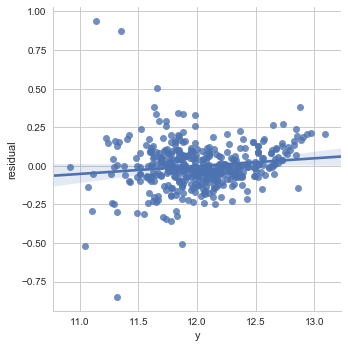

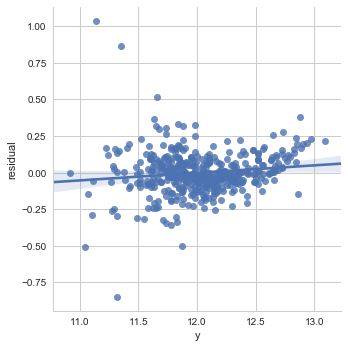

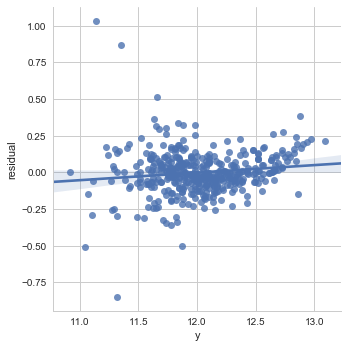

In [38]:
X_train, X_cv, y_train, y_cv = train_test_split(X_all, y_all, test_size = 0.3, random_state = 0)

plot_residual(lr, X_train, X_cv, y_train, y_cv)
plot_residual(ridge, X_train, X_cv, y_train, y_cv)
plot_residual(elasticnet, X_train, X_cv, y_train, y_cv)

## 预测-真值分布

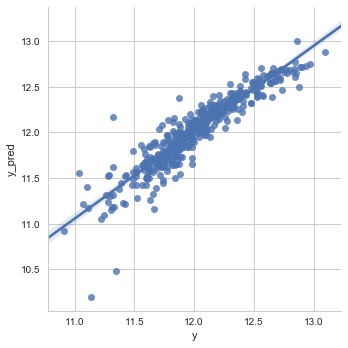

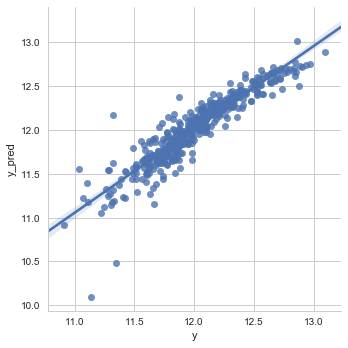

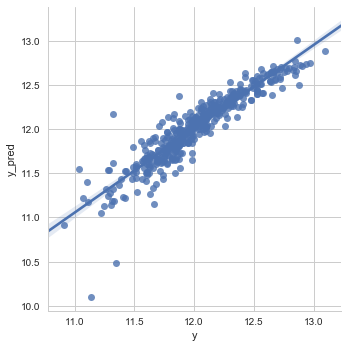

In [39]:
plot_truth_pred(lr, X_train, X_cv, y_train, y_cv)
plot_truth_pred(ridge, X_train, X_cv, y_train, y_cv)
plot_truth_pred(elasticnet, X_train, X_cv, y_train, y_cv)

## Learning Curve

In [40]:
def error_metrics(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    if cv is None:
        cv = ShuffleSplit(test_size=0.3)
 
    scoring = make_scorer(error_metrics, greater_is_better = False)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")

    return plt

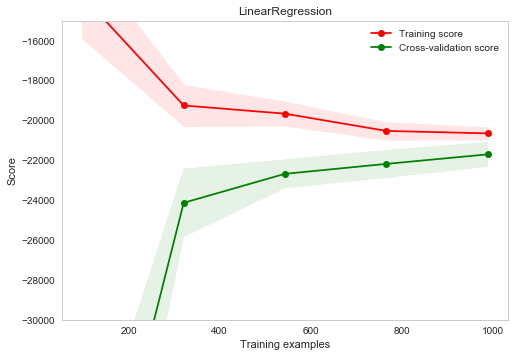

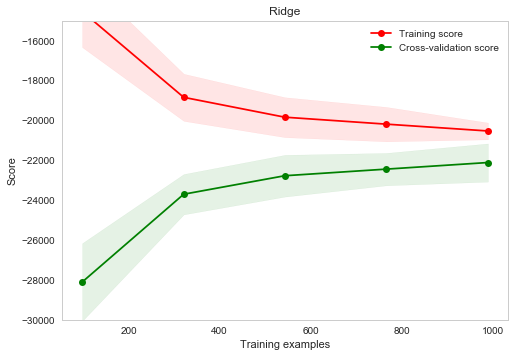

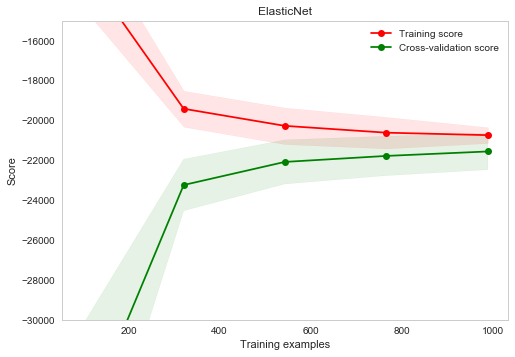

In [41]:
plot_learning_curve(lr, title='LinearRegression', X=X_all, y=y_all, ylim=(-30000,-15000)).show()
plot_learning_curve(ridge, title='Ridge', X=X_all, y=y_all, ylim=(-30000,-15000)).show()
plot_learning_curve(elasticnet, title='ElasticNet', X=X_all, y=y_all, ylim=(-30000,-15000)).show()

## 算法参数评估

用同样类似的方法，推算出其它模型的相关参数

In [42]:
cv_params = {
    'reg_lambda': [9.2, 9.3, 9.4, 9.5, 9.6, 9.7],
}

gs = GridSearchCV(
    XGBRegressor(
        objective='reg:linear',
        learning_rate=0.12,
        max_depth=3
    ),
    param_grid = cv_params
)

gs.fit(X_all, y_all)
gs.best_params_

{'reg_lambda': 9.2}